In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras
import sklearn
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import os

segmented = np.load("segmented.npy")
_, HEIGHT, WIDTH, N_CLASSES = segmented.shape
combined = np.load("combined.npy").reshape((-1, HEIGHT, WIDTH, 1))/255

Using TensorFlow backend.


In [3]:
inputs=keras.layers.Input((HEIGHT, WIDTH,1))
x=keras.layers.ZeroPadding2D(((0, 0), (0, 96-WIDTH)))(inputs)
layers = []
for n, k, s in [(32, 5, 1),(64, 5, 1),(128, 5, 1),(128, 3, 1),(128, 3, 1)]:
    x=keras.layers.Conv2D(n, kernel_size=k, strides=s, padding='same')(x)
    x=keras.layers.LeakyReLU()(x)
    x=keras.layers.Conv2D(n, kernel_size=k, strides=s, padding='same')(x)
    x=keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x=keras.layers.LeakyReLU()(x)
    x=keras.layers.BatchNormalization()(x)
    layers.append(x)
layers.pop()
for n, k, s in [(128, 3, 1),(128, 3, 1)]:
    x=keras.layers.Conv2D(n, kernel_size=k, strides=s, padding='same')(x)
    x=keras.layers.LeakyReLU()(x)
    x=keras.layers.BatchNormalization()(x)
for n, k, s in reversed([(N_CLASSES, 5, 2),(64, 5, 2),(64, 5, 2),(128, 5, 2),(128, 5, 2)]):
    x=keras.layers.Conv2DTranspose(n, kernel_size=k, strides=s, padding='same')(x)
    if len(layers)>0:
        l = layers.pop()
        x=keras.layers.concatenate([l, x])
    x=keras.layers.LeakyReLU()(x)
    x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv2DTranspose(N_CLASSES, kernel_size=5, strides=1, padding='same')(x)
x=keras.layers.Cropping2D(((0, 0), (0, 96-WIDTH)))(x)
outputs = keras.layers.Activation('softmax')(x)
model = keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 84, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 64, 96, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 64, 96, 32)   832         zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
leaky_re_lu_18 (LeakyReLU)      (None, 64, 96, 32)   0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=10.0,
                                                       width_shift_range=2,
                                                       height_shift_range=2,
                                                       shear_range=0.0,
                                                       zoom_range=0.1,
                                                       data_format='channels_last',
                                                       validation_split=0.1
                                                      )

epochs = 30
batch_size = 25
model.fit_generator(zip(datagen.flow(combined, batch_size=batch_size, subset='training', seed=1), datagen.flow(segmented, batch_size=batch_size, subset='training', seed=1)),
                    epochs=epochs, 
                    steps_per_epoch = len(combined)//batch_size,
                    validation_data=zip(datagen.flow(combined, batch_size=batch_size, subset='validation', seed=1), datagen.flow(segmented, batch_size=batch_size, subset='validation', seed=1)),
                    validation_steps=50,
                    #callbacks=[keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=0, mode='auto')],
                    verbose=2
         )

C:\Users\Buster\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (4500, 64, 84, 11) (11 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Instructions for updating:
Use tf.cast instead.


C:\Users\Buster\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (500, 64, 84, 11) (11 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/30
 - 57s - loss: 0.2756 - acc: 0.9322 - val_loss: 0.1886 - val_acc: 0.9502
Epoch 2/30
 - 51s - loss: 0.0785 - acc: 0.9778 - val_loss: 0.1025 - val_acc: 0.9736
Epoch 3/30
 - 52s - loss: 0.0526 - acc: 0.9845 - val_loss: 0.1071 - val_acc: 0.9749
Epoch 4/30
 - 51s - loss: 0.0461 - acc: 0.9863 - val_loss: 0.0830 - val_acc: 0.9782
Epoch 5/30
 - 49s - loss: 0.0426 - acc: 0.9875 - val_loss: 0.0687 - val_acc: 0.9825
Epoch 6/30
 - 47s - loss: 0.0396 - acc: 0.9885 - val_loss: 0.0707 - val_acc: 0.9815
Epoch 7/30
 - 47s - loss: 0.0390 - acc: 0.9886 - val_loss: 0.0707 - val_acc: 0.9819
Epoch 8/30
 - 47s - loss: 0.0383 - acc: 0.9888 - val_loss: 0.0658 - val_acc: 0.9833
Epoch 9/30
 - 47s - loss: 0.0371 - acc: 0.9891 - val_loss: 0.0674 - val_acc: 0.9825
Epoch 10/30
 - 47s - loss: 0.0370 - acc: 0.9893 - val_loss: 0.0653 - val_acc: 0.9823
Epoch 11/30
 - 47s - loss: 0.0363 - acc: 0.9894 - val_loss: 0.0647 - val_acc: 0.9

In [10]:
import sys

Detected a: 5
Detected a: 7


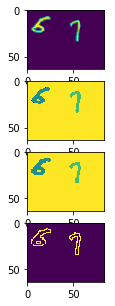

In [ ]:
N_TEST = 1
SEED = np.random.randint(0, 1000)
originals = next(datagen.flow(combined, batch_size=N_TEST, subset='validation', seed=SEED))
ground_truth = next(datagen.flow(segmented, batch_size=N_TEST, subset='validation', seed=SEED))
predicted = model.predict_on_batch(originals)
predicted = np.round(predicted).astype(np.int)
plt.figure(figsize=(20, 5))
np.set_printoptions(threshold=sys.maxsize)
for i in range(N_TEST):
    plt.subplot(4, N_TEST, i+1)
    plt.imshow(originals[i].reshape((HEIGHT, WIDTH)))
    plt.subplot(4, N_TEST, i+1+N_TEST)
    plt.imshow(np.argmax(predicted[i], axis=2), vmax=10, vmin=0)
    plt.subplot(4, N_TEST, i+1+2*N_TEST)
    plt.imshow(np.argmax(ground_truth[i], axis=2), vmax=10, vmin=0)
    plt.subplot(4, N_TEST, i+1+3*N_TEST)
    plt.imshow(np.any(predicted[i]-ground_truth[i], axis=2))
    for j in range(10):
        if (predicted[:,:,:,j].sum(1).sum() >= 50):
            print("Detected a: " + str(j))
        

In [215]:
model.save('mnist_segmentation.model')

In [64]:
np.argmax(originals[0],axis=2)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [106]:
predicted[:,:,:,3]

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [142]:
predicted[:,:,:,j].sum(1).sum()

143

In [171]:
    for j in range(10):
        if (predicted[:,:,:,j].sum(1).sum() >= 30):
            print("Detected a: " + str(j))

Detected a: 0
Detected a: 2
